<a href="https://colab.research.google.com/github/Srayoshi-Mirza/Lasik-Laser-Eye-Surgery-Complication-Analysis/blob/main/Lasik_((Laser_Eye_Surgery)_Complications).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective of this project: Exploring the dataset and analyze the relationship between date and reported complications.

# **Imported Libraries**

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# **Loading and Exploring the Dataset**

In [74]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Srayoshi-Mirza/Lasik-Laser-Eye-Surgery-Complication-Analysis/main/laser_eye_surgery_complications.csv')  # Replace 'your_dataset.csv' with the actual file name

# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1368 non-null   int64 
 1   date      1368 non-null   object
 2   text      1368 non-null   object
 3   keywords  1132 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.9+ KB
None


In [75]:
# Display the first few rows of the dataset
df.head()

,id,date,text,keywords
0,101036,1997-06-16,Chiron microkeratome suction popped off during...,Flap Issues; Astigmatism
1,101032,1997-06-16,Chiron keratome was used to perform a corneal ...,Flap Issues
2,98209,1997-06-16,"Laser treatment cut pt's eye. As a result, pt ...",NaN
3,101211,1997-06-26,Dr. Is using a non-approved laser machine.,NaN
4,102312,1997-07-02,Dr is using a non-approved laser.,NaN


**Distribution Graph of the Dataset**

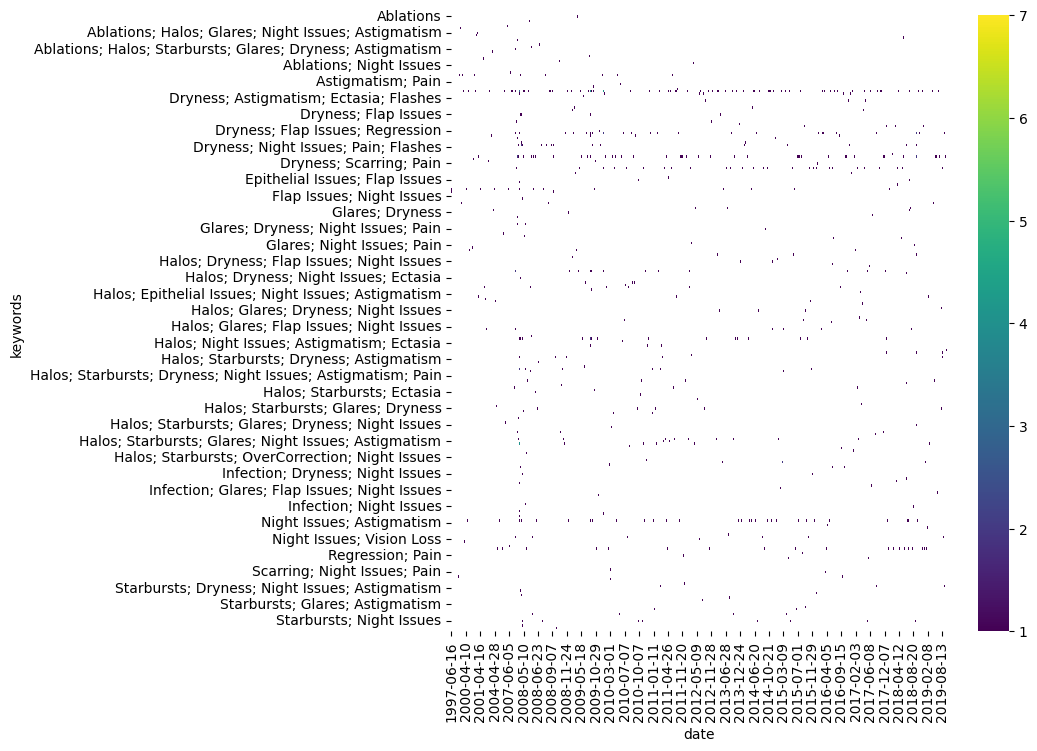

In [76]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['keywords'].value_counts()
    for x_label, grp in df.groupby('date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('date')
_ = plt.ylabel('keywords')

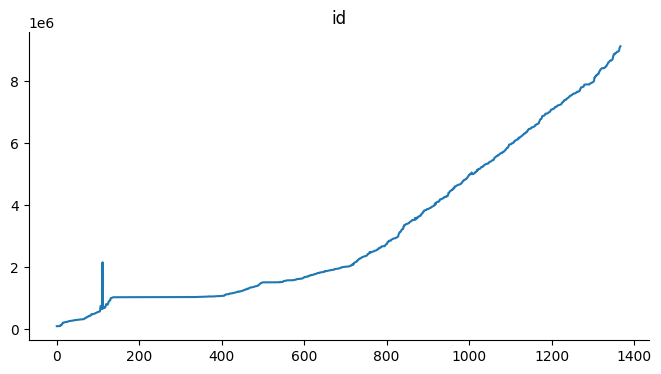

In [77]:
df['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

In [78]:
#text = " ".join(df['text'])

# **Preprocessing the Data**

In [79]:
# Check for missing values
print(df.isnull().sum())

id            0
date          0
text          0
keywords    236
dtype: int64


In [80]:
df = df.dropna()

In [81]:
# Convert the 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# **Label Encoded**

In [82]:
label_encoder = LabelEncoder()

In [83]:
# Split keywords into separate rows
df['keywords'] = df['keywords'].apply(lambda x: x.split(';') if isinstance(x, str) else [])

In [84]:
# Explode the 'keywords' column
df_expanded = df.explode('keywords')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132 entries, 0 to 1367
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        1132 non-null   int64         
 1   date      1132 non-null   datetime64[ns]
 2   text      1132 non-null   object        
 3   keywords  1132 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 44.2+ KB


In [86]:
# Export the expanded DataFrame to an Excel file
output_file_path = 'expanded_data.xlsx'  # Choose a desired file path
df_expanded.to_excel(output_file_path, index=False)

print(f'Data exported to {output_file_path}')

Data exported to expanded_data.xlsx


In [87]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2687 entries, 0 to 1367
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        2687 non-null   int64         
 1   date      2687 non-null   datetime64[ns]
 2   text      2687 non-null   object        
 3   keywords  2687 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 105.0+ KB


In [89]:
label_encoder = LabelEncoder()
df_expanded['reported_complications_encoded'] = label_encoder.fit_transform(df_expanded['keywords'])

In [91]:
# Check for missing values
print(df_expanded.isnull().sum())

id                                0
date                              0
text                              0
keywords                          0
reported_complications_encoded    0
dtype: int64


In [94]:
df_expanded['year'] = df_expanded['date'].dt.year
df_expanded['month'] = df_expanded['date'].dt.month
df_expanded['quarter'] = df_expanded['date'].dt.quarter

# Encode the target variable
label_encoder = LabelEncoder()
df_expanded['reported_complications_encoded'] = label_encoder.fit_transform(df_expanded['keywords'])

# Select features and encoded target variable
X = df_expanded[['year', 'month', 'quarter']]
y = df_expanded['reported_complications_encoded']

# **Before Checking and Removing Outlier**

Text(0.5, 1.0, 'Box Plot of Features Before Outlier Removal')

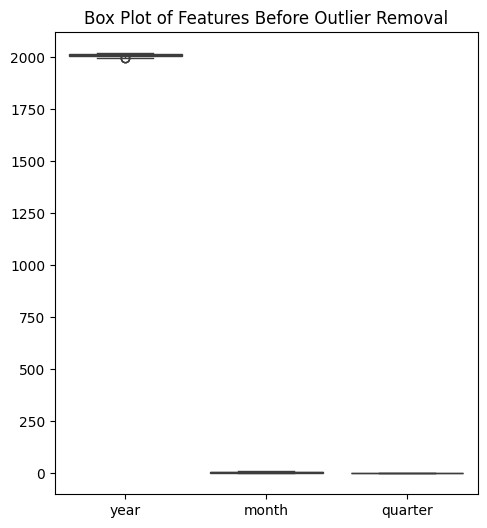

In [95]:
# Visualize box plot before outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X)
plt.title('Box Plot of Features Before Outlier Removal')

# **After Checking and Removing Outliers**

In [96]:
z_scores = np.abs(stats.zscore(X))
filtered_entries = (z_scores < 3).all(axis=1)
X_no_outliers = X[filtered_entries]

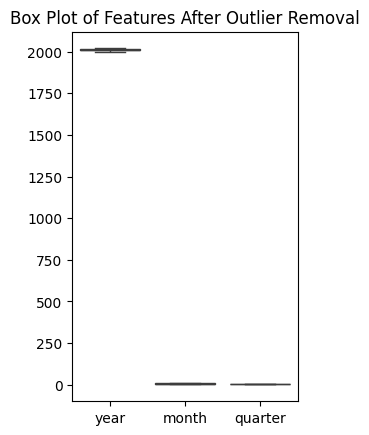

In [97]:
# Visualize box plot after outlier removal
plt.subplot(1, 2, 2)
sns.boxplot(data=X_no_outliers)
plt.title('Box Plot of Features After Outlier Removal')

plt.show()

# **Feature Engineering**

In [98]:
# Extract year, month, and quarter from the 'date' column
df_expanded['year'] = df_expanded['date'].dt.year
df_expanded['month'] = df_expanded['date'].dt.month
df_expanded['quarter'] = df_expanded['date'].dt.quarter

# **Choosing Features and Target Variable**

In [99]:
# Select features and encoded target variable
X = df_expanded[['year', 'month', 'quarter', 'reported_complications_encoded']]
y = df_expanded['reported_complications_encoded']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Train the Linear Regression Model**

In [101]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

# **Evaluate the Model**

The Mean Squared Error (MSE) and R-squared (R²) score are metrics used to evaluate the performance of a regression model. That's why we have used these two here.



1.   **Mean Squared Error (MSE):**
**Definition:** It measures the average squared difference between the predicted values and the actual values.
Interpretation: The lower the MSE, the better the model. It quantifies how well the model's predictions match the actual data. However, the absolute value of MSE doesn't have a direct intuitive interpretation.
2.   **R-squared (R²) Score:**
**Definition:** It measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features).
Interpretation: R² ranges from 0 to 1, where 0 indicates that the model does not explain any variability in the target variable, and 1 indicates that the model explains all the variability. A negative R² suggests that the model is performing worse than a model that predicts the mean of the target variable for all observations.
In your case:


In [102]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model (you can use different metrics depending on your problem)
from sklearn.metrics import mean_squared_error, r2_score

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 6.46409103106912e-30
R^2 Score: 1.0


MSE is 5677.41, indicating that, on average, the squared difference between the predicted reported complications and the actual reported complications is approximately 5677.41.

R² is -0.0158, indicating that the model is not explaining much of the variability in the reported complications. A negative R² suggests that the model does not perform well, and it might not be capturing the underlying patterns in the data.

The model's performance, based on MSE and R², seems to be suboptimal. We may explore more additional features and consider more complex models in the future.

# **Visualize the Results**

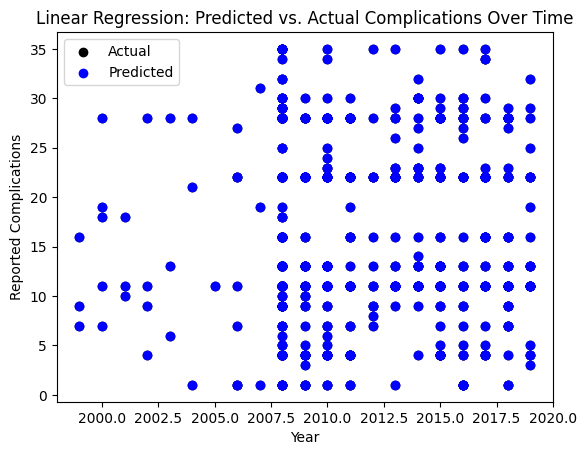

In [103]:
# Visualize predictions vs. actual values
plt.scatter(X_test['year'], y_test, color='black', label='Actual')
plt.scatter(X_test['year'], y_pred, color='blue', label='Predicted')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Reported Complications')
plt.title('Linear Regression: Predicted vs. Actual Complications Over Time')
plt.show()